In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# Visualization

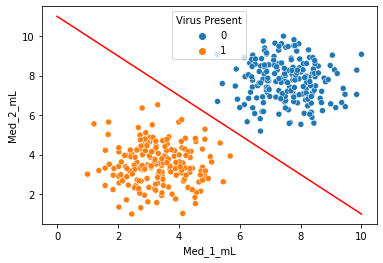

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

#ploting hyperplane(line incae of 2d )

x=np.linspace(0,10,100)
m=-1
b=11
y=m*x + b
plt.plot(x,y,'red')

# SVM method

In [5]:
X=df.drop('Virus Present',axis=1)

In [6]:
y=df['Virus Present']

In [7]:
#importing SVM
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [9]:
model= SVC(kernel='linear',C=1000)

In [10]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [11]:
#calling Svm_margin_plot present in file code fom documentation
from svm_margin_plot import plot_svm_boundary

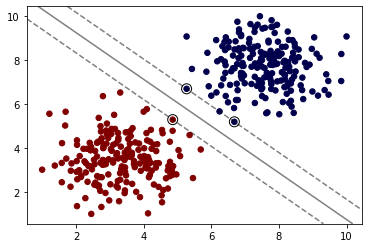

In [12]:
plot_svm_boundary(model,X,y)

In [13]:
# exploring C value

In [25]:
#putting smaller C value
model= SVC(kernel='linear',C=0.05)

In [26]:
model.fit(X,y)

SVC(C=0.05, kernel='linear')

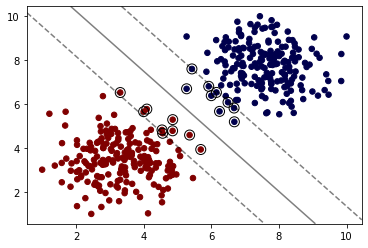

In [27]:
plot_svm_boundary(model,X,y)

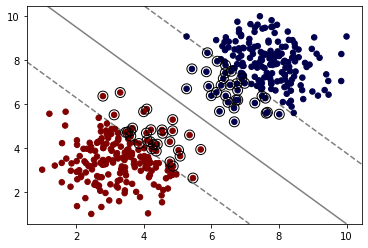

In [29]:
#more Smaller C value
model= SVC(kernel='linear',C=0.005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

# we can see that smaller the value of C higher the value of misclassfication we are allowwing

# exploring diffirent kernels

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

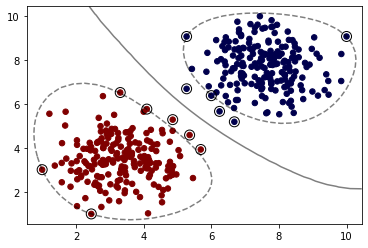

In [31]:
#exploring Radio basis func/ kernel(defualt of Svm)
model= SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

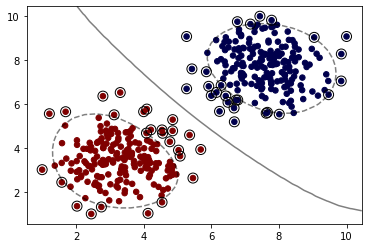

In [32]:
#exploring Radio basis func/ kernel(defualt of Svm) with smaaler vlaue of C
model= SVC(kernel='rbf',C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

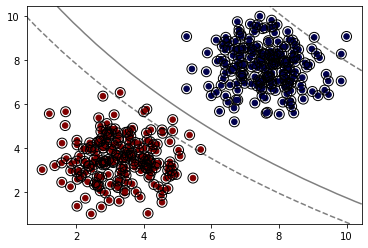

In [33]:
# exploring sigmoid kernel(defualt of Svm) 
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

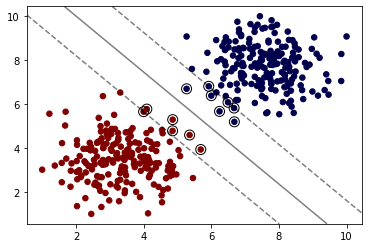

In [34]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### exploring parameter gammma

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

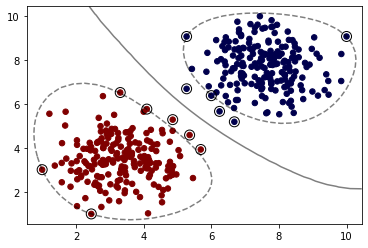

In [38]:
# seeting gamma as scale
model = SVC(kernel='rbf', C=1,gamma='scale')
model.fit(X, y)
plot_svm_boundary(model,X,y)

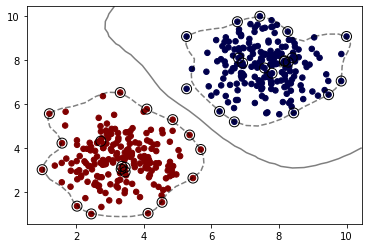

In [39]:
#setting gamma as auto
model = SVC(kernel='rbf', C=1,gamma='auto')
model.fit(X, y)
plot_svm_boundary(model,X,y)

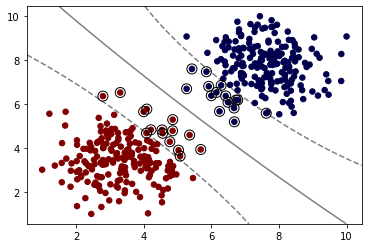

In [40]:
# seting flaot value of gamma
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
model=SVC()
params={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [43]:
svc_grid_model= GridSearchCV(model,param_grid=params)

In [44]:
svc_grid_model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [45]:
svc_grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}